## <center> **Práctica 1: cinemática del flujo utilizando Jupyter Notebook** </center>


###<center> Tema 1. Mecánica de fluidos, Curso 2023-2024</center>
####<center> Adrián Navas Montilla</center>

Grupo de prácticas:

Nombre y apellidos 1:

Nombre y apellidos 2:

-----------------------------------------


## **Introducción a Jupyter Notebook**



Esto es un cuaderno interactivo donde podemos añadir celdas de texto (como esta), o celdas de código (como la celda inferior). Las celdas de texto permiten escribir texto con *distintos* **formatos** y ecuaciones como esta:
$$c=a·b$$
Para editar una celda de texto basta con hacer doble click en ella. Las celdas de código permiten ejecutar código en lenguaje Python, por ejemplo, podemos asignar valores a las variables $a$ y $b$ de la fórmula anterior y calcular $c$, como si de una calculadora de tratara:

In [ ]:
a= 2.0
b= 3.0
c=a*b

print("El resultado de a*b es:",c) #la función print() permite mostrar por pantalla texto y variables numéricas o simbólicas

El resultado de a*b es: 6.0


Lo primero que debemos hacer es cargar las librerías necesarias de Python. Como vamos a trabajar con cálculo simbólico y numérico cargaremos las librerías ```sympy``` y ```numpy```. Además, para hacer representaciones gráficas cargaremos la librería ```matplotlib```. En la siguiente celda de código se cargan estas librerías:

In [ ]:
from sympy import *             # Librería para trabajo simbólico
import numpy as np              # Librería para cálculo numérico
import math                     # Librería para utilizar símbolos matemáticos como el número pi, que se escribe como math.pi
import matplotlib.pyplot as plt # Librería para poder dibujar gráficas

### Introducción al cálculo diferencial con funciones de varias variables

En este apartado vamos a aprender a definir funciones, evaluarlas, calcular sus derivadas, etc. Consideremos la siguiente función correspondiente a un campo escalar de temperatura en 2 dimensiones:

$$ T(x,y) = x^2 + y^2 + 10 $$


Las variables $x$ e $y$ de las que depende la función debemos declararlas como variables simbólicas, ya que todavía no les hemos asignado un valor numérico


In [ ]:
x,y=symbols('x y') #Declaramos x e y como variable simbólica: nos permite "arrastrarla" como un símbolo hasta que decidamos darle valor.

Para definir la función $T(x,y)$ haremos lo siguiente:

In [ ]:
def T(x,y):
    return  x**2+y**2+10

Y para evaluarla en un punto (p. ej en $x=1.7$ y $y=1.5$), podemos hacerlo de dos maneras distintas:

In [ ]:
#Opcion 1
print(T(1.7,1.5))
#Opcion 2
print(T(x,y).subs([(x,1.7),(y,1.5)]))

15.14
15.1400000000000


Antes de continuar, vamos a hacer una representación gráfica de esta función en el dominio espacial $[0,2]\times[0,2]$

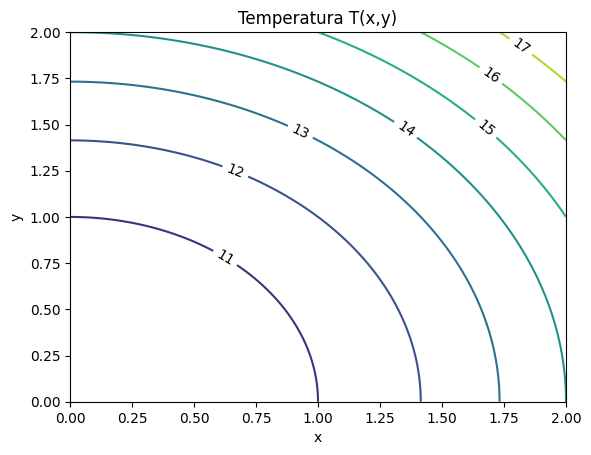

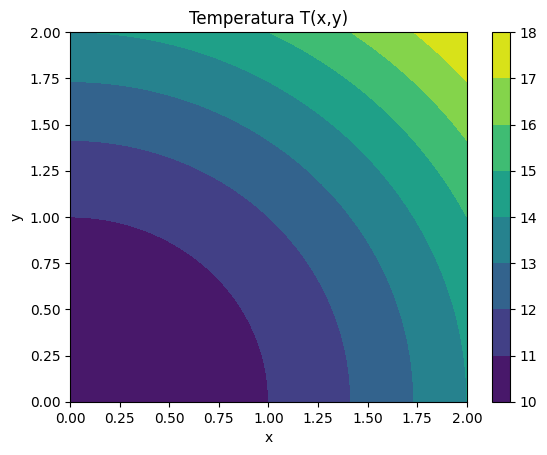

In [ ]:
L=2                           #longitud del dominio
N = 100                       #numero de puntos en cada dirección
xp = np.linspace(0, L, N)     #coordenadas de los puntos en x
yp = np.linspace(0, L, N)     #coordenadas de los puntos en y
X, Y = np.meshgrid(xp, yp)    #matriz de coordenadas de puntos
Z = T(X,Y)                    #valores de T(x,y) en los puntos

## Dos formas de representar lo mismo

## FIGURA 1 (lineas de contorno)
fig, ax = plt.subplots()      #genera el objeto "figura"
CS = ax.contour(X, Y, Z)     #hace la representación gráfica
#Esto es para configurar ejes, etiquetas, etc...
ax.clabel(CS, inline=True, fontsize=10, colors='black')
ax.set_title('Temperatura T(x,y)')
ax.set_xlabel("x")
ax.set_ylabel("y")

## FIGURA 2 (mapa de colores)
fig, ax = plt.subplots()      #genera el objeto "figura"
CS = ax.contourf(X, Y, Z)     #hace la representación gráfica
#Esto es para configurar ejes, barra de color, etiquetas, etc...
ax.set_title('Temperatura T(x,y)')
ax.set_xlabel("x")
ax.set_ylabel("y")
fig.colorbar(CS)


También podemos hacer gráficas en una dimensión (más sencillas). Por ejemplo, podemos representar $T(x,y)$ a lo largo del eje $x$ (es decir, haciendo $y=0$):

Text(0, 0.5, 'T(x,0)')

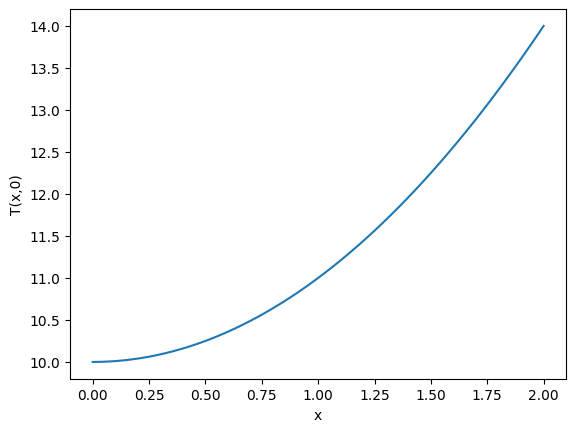

In [ ]:
L=2                           #longitud del dominio
N = 100                       #espaciado entre puntos
xp = np.linspace(0, L, N)     #puntos en x
temp = T(xp,0.0)

fig, ax  = plt.subplots() #genera el objeto "figura"
ax.plot(xp,temp)          #pinta la gráfica
ax.set_xlabel("x")
ax.set_ylabel("T(x,0)")

Ahora vamos a aprender a calcular una derivada parcial de una función. En este caso calcularemos las derivadas parciales de $T(x,y)$ respecto de $x$ e $y$:

$$\frac{\partial T(x,y)}{\partial x} \hbox{     y     } \frac{\partial T(x,y)}{\partial y}$$

para ello, utilizamos el método ```diff()``` :

In [ ]:
dTdx = T(x,y).diff(x) #calcula la derivada parcial respecto a x
dTdy = T(x,y).diff(y) #calcula la derivada parcial respecto a y

print("La derivada de T respecto de x es: dTdx =",dTdx)
print("La derivada de T respecto de y es: dTdy =",dTdy)

La derivada de T respecto de x es: dTdx = 2*x
La derivada de T respecto de y es: dTdy = 2*y


Dado que $T(x,y)$ es un campo escalar en dos dimensiones, es muy útil el uso del **gradiente** para calcular variaciones en el plano $x,y$ y direcciones de máxima variación. El gradiente de $T(x,y)$ es un vector en cuyas componentes tenemos las derivadas de $T$ respecto de las distintas coordenadas espaciales:

$$\nabla T(x,y)=\left(\begin{array}{c}
\frac{\partial T(x,y)}{\partial x}\\
\frac{\partial T(x,y)}{\partial y}
\end{array}
\right)$$

donde $\nabla$ es el operador nabla. Vamos a construir el gradiente de $T$:

In [ ]:
def grad(f):
    g_x=f.diff(x)
    g_y=f.diff(y)
    return g_x,g_y

print("El vector gradiente de T(x,y) es:")
display(grad(T(x,y)))

El vector gradiente de T(x,y) es:


(2*x, 2*y)

Ahora vamos a representar el gradiente (que es un campo vectorial) sobre la representación gráfica de la temperatura:

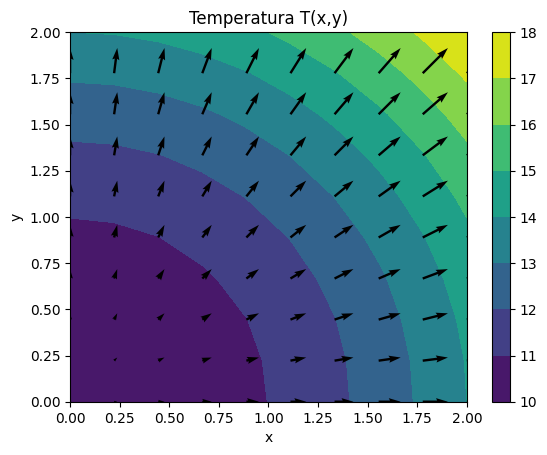

In [ ]:
L=2                           #longitud del dominio
N = 10
nq=1                         #espaciado entre puntos (para que las flechas no estén muy juntas)

xp = np.linspace(0, L, N)     #puntos en x
yp = np.linspace(0, L, N)     #puntos en y
X, Y = np.meshgrid(xp, yp)    #matriz de puntos

Z = T(X,Y)                    #valores de T(x,y) en los puntos
Gx = 2*X                      #valores de la componente x del gradiente en los puntos
Gy = 2*Y                      #valores de la componente y del gradiente en los puntos

fig, ax = plt.subplots()
CS = ax.contourf(X, Y, Z)
ax.quiver(X, Y, Gx, Gy)

#Esto es para configurar ejes, barra de color, etiquetas, etc...
ax.set_title('Temperatura T(x,y)')
ax.set_xlabel("x")
ax.set_ylabel("y")
fig.colorbar(CS)


Como vemos en la figura anterior, el gradiente muestra la dirección de máxima variación de $T(x,y)$.

### Cálculo de la derivada total

Consideremos el campo de temperaturas del ejemplo anterior:

$$ T(x,y) = x^2 + y^2 + 10 $$

y un campo de velocidades:

 $$ \vec{\mathbf{v}} =(3(x+2),0) $$

 Vamos a volver a definir todas las variables (aunque no es necesario):

In [ ]:
x, y, t = symbols('x y t')
u=Function('u')(t,x,y)
v=Function('v')(t,x,y)

def DDt(f):
    return f.diff(t)+u*f.diff(x)+v*f.diff(y) #en dos dimensiones. Para hacerla en 3D habria que incluir tambien +w*f.diff(z)

def T(x,y):
    return  x**2+y**2+10

u=3*(x+2)
v=0

La **derivada total** (también llamada derivada sustancial) de una partícula fluida que se desplaza según un campo de velocidades $\mathbf{v}$ se calcula como:

$$ \frac{DT}{Dt}= \frac{\partial T}{\partial t} + u\frac{\partial T}{\partial x} + v\frac{\partial T}{\partial y}+ w\frac{\partial T}{\partial z}$$

que de manera compacta se puede escribir como:
$$ \frac{DT}{Dt}= \frac{\partial T}{\partial t} + \vec{\mathbf{v}} \cdot \nabla T$$

Ésta se compone de dos términos:

- Derivada local $\frac{\partial T}{\partial t}$: es la derivada parcial de la temperatura respecto de $t$. Para calcularla haremos ```T(x,y).diff(t)```.

- Derivada convectiva $\vec{\mathbf{v}}\cdot\nabla T$:  es la derivada direccional de $T$ en la dirección de la velocidad. Se calcula mediante el producto escalar entre $\vec{\mathbf{v}}$ y $\nabla T$, es decir $\mathbf{v}\cdot\nabla T$.

Vamos a ver cómo calcular la derivada total con Python. **Nota**: *Vamos a usar la temperatura y velocidad definidas arriba, en 2 dimensiones, por lo que **omitimos las derivadas y velocidades en $z$**.*

In [ ]:
## DERIVADA TOTAL
def DDt(f):
    #Derivada temporal:
    dTdt = f.diff(t)
    #Derivada convectiva
    dTdx = f.diff(x)
    dTdy = f.diff(y)
    #Derivada total
    return dTdt + u*dTdx + v*dTdy

print("El resultado es:")
display(DDt(T(x,y)))


print("\nPodemos escribir la expresión expandida viendo todos los términos:")
print("DTdt=",T(x,y).diff(t),"+(",u,")*(",T(x,y).diff(x),")+(",v,")*(",T(x,y).diff(y),")=",DDt(T(x,y)))

El resultado es:


2*x*(3*x + 6)


Podemos escribir la expresión expandida viendo todos los términos:
DTdt= 0 +( 3*x + 6 )*( 2*x )+( 0 )*( 2*y )= 2*x*(3*x + 6)


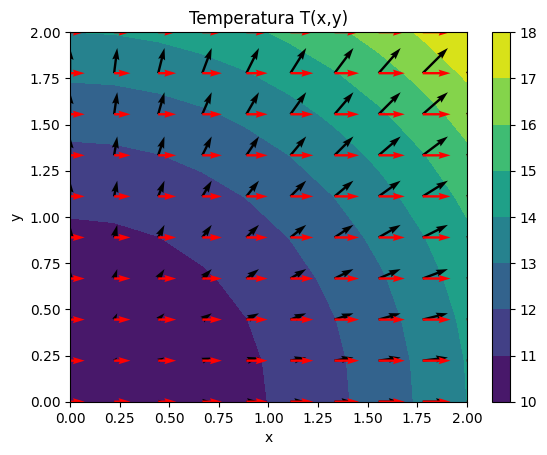

In [ ]:
L=2                           #longitud del dominio
N = 10                       #espaciado entre puntos

xp = np.linspace(0, L, N)     #puntos en x
yp = np.linspace(0, L, N)     #puntos en y
X, Y = np.meshgrid(xp, yp)    #matriz de puntos

Z = T(X,Y)                    #valores de T(x,y) en los puntos
Gx = 2*X                      #valores de la componente x del gradiente en los puntos
Gy = 2*Y                      #valores de la componente y del gradiente en los puntos
U = 3*(X+2)                  #valores de la componente x de la velocidad en los puntos
V = 0.0                      #valores de la componente y de la velocidad en los puntos

fig, ax = plt.subplots()      #genera el objeto "figura"
CS = ax.contourf(X, Y, Z)
ax.quiver(X, Y, Gx, Gy)
ax.quiver(X, Y, U, V,color="r")

#Esto es para configurar ejes, barra de color, etiquetas, etc...
ax.set_title('Temperatura T(x,y)')
ax.set_xlabel("x")
ax.set_ylabel("y")
fig.colorbar(CS)

Vamos a calcular la derivada total en los puntos $(1,0)$ y $(0,1)$.

In [ ]:
DTDt=DDt(T(x,y)) #esto es un alias para simplificar notación

xp=1
yp=0
print("DTdt en el punto (1,0) es:",DTDt.subs([(x,xp),(y,yp)]))

xp=0
yp=1
print("DTdt en el punto (0,1) es:",DTDt.subs([(x,xp),(y,yp)]))

DTdt en el punto (1,0) es: 18
DTdt en el punto (0,1) es: 0


Vemos que en el punto $(0,1)$ la derivada total será cero, ya que la velocidad es perpendicular al vector gradiente en $x=0$ (y no hay derivada temporal).

### Divergencia y rotacional de la velocidad

La divergencia de la velocidad se calcula como el producto escalar del operador Nabla por la velocidad, que da lugar a un valor escalar:
 $$ \nabla \cdot \vec{\mathbf{v}}= \frac{\partial u}{\partial x}+\frac{\partial v}{\partial y}+\frac{\partial w}{\partial z}$$

y el rotacional como el producto vectorial del operador Nabla por la velocidad:
 $$
\nabla \times \vec{\mathbf{v}}=\begin{bmatrix}{\frac {\partial w}{\partial y}}-{\frac {\partial v}{\partial z}}\\{\frac {\partial u}{\partial z}}-{\frac {\partial w}{\partial x}}\\{\frac {\partial v}{\partial x}}-{\frac {\partial u}{\partial y}}\end{bmatrix}
 $$

 Vamos a trabajar con el siguiente campo de velocidad:

  $$ \vec{\mathbf{v}}= (2y^2,0,0)$$

y calcular la divergencia y el rotacional:

In [ ]:
x,y,z,t=symbols('x y z t')

u=2*sqrt(y)
v=0*t
w=0*t

## DIVERGENCIA
def div(u,v,w):
    return u.diff(x)+v.diff(y)+w.diff(z)

print("La divergencia del flujo es",div(u,v,w))

## ROTACIONAL
def rot(u,v,w):
    dudy = u.diff(y)
    dudz = u.diff(z)

    dvdx = v.diff(x)
    dvdz = v.diff(z)

    dwdx = w.diff(x)
    dwdy = w.diff(y)

    rot_x = dwdy - dvdz
    rot_y = dudz - dwdx
    rot_z = dvdx - dudy

    return rot_x,rot_y,rot_z

print("El rotacional del flujo es:")
display(simplify(rot(u,v,w)))

La divergencia del flujo es 0
El rotacional del flujo es:


(0, 0, -1/sqrt(y))

Podemos ver que el flujo es incompresible (divergencia cero), pero es rotacional (rotacional distinto de cero). La dirección de rotación es el eje z.

## **Ejercicios propuestos**

Resolver los siguientes ejercicios:

**Ejercicio 1 (4.5 pt)**: La temperatura de una habitación viene dada por el siguiente campo escalar:

$$ T(x,y,z,t) = 273 + x(y -1)^2zt $$

El campo de velocidades dentro de la habitación es:

$$ \mathbf{v}= ((x^2-1)yz,   yz^2t,   2xyzt^2 )$$

Se pide, tanto **a mano como en Python**:

a) Calcula la expresión de la derivada total de la temperatura.

b) Calcula la derivada total de la temperatura en $(x,y,z)=(1,1,1)$

c) Calcula la aceleración euleriana del campo fluido (hacerlo **componente a componente**, repitiendo 3 veces el código del apartado a) para $u$, $v$ y $w$).

d) Calcula la divergencia de la velocidad, ¿es un flujo compresible?

e) Calcula el rotacional de la velocidad, ¿es un flujo irrotacional?


In [ ]:
x,y,z,t=symbols('x y z t')

#Campo de velocidades:
u=                           # <<<-----
v=                           # <<<-----
w=                           # <<<-----

#Campo de temperaturas:
def T(x,y,z,t):
    return  273 +             # <<<-----

#Operadores:
def DDt(f):
    #Derivada temporal:
    dTdt = f.diff(t)
    #Derivada convectiva
    dTdx = f.diff(x)
    dTdy =                  # <<<-----
    dTdz =                  # <<<-----
    #Derivada total
    return                  # <<<-----

def div(u,v,w):
    return u.diff(x)+v.diff(y)+w.diff(z)

def rot(u,v,w):
    dudy = u.diff(y)
    dudz =                  # <<<-----

    dvdx = v.diff(x)
    dvdz =                  # <<<-----

    dwdx =                  # <<<-----
    dwdy =                  # <<<-----

    rot_x =                  # <<<-----
    rot_y =                  # <<<-----
    rot_z =                  # <<<-----
    return rot_x,rot_y,rot_z

##APARTADO a)

#Derivada total
DTDt =                       # <<<----- completar la expresion utilizando la función correspondiente

print("a) El resultado es:")
display(DTDt)

##APARTADO b)
print("\nb) El resultado es:")
display(  )                  # <<<----- completar haciendo DTdt.subs(.....)

##APARTADO c)
DuDt =                        # <<<----- completar utilizando función DDt(u)
DvDt =                        # <<<----- completar
DwDt =                        # <<<----- completar

print("\nc) Las componentes x,y,z de la aceleración son:")
display(DuDt,DvDt,DwDt)

##APARTADO d)

divV =                        #<<<----- completar utilizando la función correspondiente

print("La divergencia del flujo es:")
display(simplify(divV))
##APARTADO e)


rotV=                         #<<<----- completar utilizando la función correspondiente

print("El rotacional del flujo es:")
display(simplify(rotV))



SyntaxError: ignored

**Ejercicio 2 (4.5 pt)**: Disponemos de una fuente ornamental que genera un flujo no estacionario descrito por el siguiente campo de velocidades:

$$\mathbf{v}=u_0\sin\left(w\left(t-\frac{y}{v_0}\right)\right)\mathbf{\hat{i}}+v_0\mathbf{\hat{j}}$$

El campo de velocidades, así como las distintas líneas características del flujo se han representado en la animación bajo el enunciado. Ejecuta la celda de código inferior (sin modificarla) y observa esta animación para entender cómo es el flujo de la fuente.

Se pide resolver los siguientes apartados:

**a.1)** Calcular la expresión general de las líneas de corriente

**a.2)** Calcular la expresión de la línea de corriente que pasa por $(x,y)=(0,0)$ en el instante $t=0$.

**b.1)** Calcular la expresión general de las trayectorias de la partículas.

**b.2)** Calcular la trayectoria de la partícula que pasa por el origen en $t=\pi/2w$.

Y también se pide:

**c)** Hacer una representación gráfica de las líneas obtenidas en los apartados anteriores  (a.2, b.2) y comparar con los resultados de la animación inferior.

### Código Animación -> ejecuta la celda oculta

In [ ]:
from matplotlib import animation
from IPython.display import HTML
from scipy.interpolate import Rbf

delta = 0.2 #malla espacial
nq=2        #separacion entre vectores en quiver plot

u0 =1.0
v0 =2.0
w  =2.0

lmb = 2.0*math.pi*v0/w #longitud de onda
Tp  = 2.0*math.pi/w    #periodo

L=0.50*lmb

xp = np.arange(-L, L, delta)
yp = np.arange(0, 2*L, delta)
X, Y = np.meshgrid(xp, yp)


t=0.0
U = u0*np.sin(w*(t-Y/v0))
V = v0*np.ones((len(yp),len(xp)))

nframes=60    #frames de la animacion
tf=Tp         #tiempo total
dt=Tp/nframes #paso de tiempo


fig, (ax,ax2)= plt.subplots(1,2,figsize=(10, 5))
ax.set_title("Líneas de corriente")
ax2.set_title("Trayectorias (verde) y traza (azul)")
plt.tight_layout()
plt.close()

seed_points = np.array([[-0.25*L, .0, 0.25*L], [0.0, 0.0, 0.0]])

Q = ax2.quiver(X[::nq,::nq], Y[::nq,::nq], U[::nq,::nq], V[::nq,::nq])
ax2.set_ylim([0, 2*L])
ax2.set_xlim([-L, L])
line2, = ax2.plot([], [], 'g-', lw=2, alpha=.2)
line1, = ax2.plot([], [], 'b--', lw=2)
pt1, = ax2.plot([], [], 'g.', ms=20)
pt2, = ax2.plot([], [], 'g.', ms=20)
pt3, = ax2.plot([], [], 'g.', ms=20)
pt4, = ax2.plot([], [], 'g.', ms=20)

def update_plot(num):
    t = dt*num
    dx=t*2.0
    U = u0*np.sin(w*(t-Y/v0))
    ax.cla()
    ax.set_title("Líneas de corriente")
    ax.quiver(X[::nq,::nq], Y[::nq,::nq], U[::nq,::nq], V[::nq,::nq])
    ax.streamplot(X, Y, U, V, start_points=seed_points.T, color='tab:red', linewidth=2)
    ax.plot(seed_points[0],seed_points[1],'go')
    xx=u0/v0*yp*np.sin(w*(t-yp/v0))
    line1.set_data(xx, yp)

    xx=u0/v0*yp*np.sin(w*t)
    line2.set_data(xx, yp)
    t0 =0.0*Tp/4
    yy1 =v0*(t-t0)
    yy0= 0.0
    xx1=u0/v0*yy1*(np.sin(w*t0-w/v0*yy0))
    pt1.set_data(xx1,yy1)
    ax2.plot(xx1,yy1, 'g.', ms=3)

    t0 =0.125*Tp
    yy1 =v0*(t-t0)
    yy0= 0.0
    xx1=u0/v0*yy1*(np.sin(w*t0-w/v0*yy0))
    pt2.set_data(xx1,yy1)
    ax2.plot(xx1,yy1, 'g.', ms=3)

    t0 =0.25*Tp
    yy1 =v0*(t-t0)
    yy0= 0.0
    xx1=u0/v0*yy1*(np.sin(w*t0-w/v0*yy0))
    pt3.set_data(xx1,yy1)
    ax2.plot(xx1,yy1, 'g.', ms=3)

    t0 =0.42*Tp
    yy1 =v0*(t-t0)
    yy0= 0.0
    xx1=u0/v0*yy1*(np.sin(w*t0-w/v0*yy0))
    pt4.set_data(xx1,yy1)
    ax2.plot(xx1,yy1, 'g.', ms=3)
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    return

anim = animation.FuncAnimation(fig, update_plot, frames=nframes, interval=100, blit=False)

### Animación -> ejecuta para generar la animación

In [ ]:
HTML(anim.to_html5_video())

<ipython-input-35-bc578edffeb0>:67: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor releases later
  pt1.set_data(xx1,yy1)
<ipython-input-35-bc578edffeb0>:74: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor releases later
  pt2.set_data(xx1,yy1)
<ipython-input-35-bc578edffeb0>:81: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor releases later
  pt3.set_data(xx1,yy1)
<ipython-input-35-bc578edffeb0>:88: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor releases later
  pt4.set_data(xx1,yy1)


**Ejercicio 3 (1 pt)**:

Realiza la representación gráfica en Python de un campo de velocidades 2D que **sea rotacional**  y explica en qué aplicación (natural, industrial...) puede encontrarse. Se pide

- Representar el campo vectorial de velocidades
- Representar la magnitud del rotacional
- Realizar una animación en la que se vea el movimiento de las partículas fluidas y se representen las trayectorias. Para ello, puedes utilizar fragmentos de código de esta web: https://mdfi.000webhostapp.com/content/chapter1/tema1/lineas_caracteristicas.html

No olvidéis rellenar vuestro nombre y apellidos bajo el título. Recuerda que el formato de entrega del archivo debe ser PRC1_GrupoX.ipynb, que se obtiene descargando este cuaderno en "*Archivo->Descargar .ipynb*".